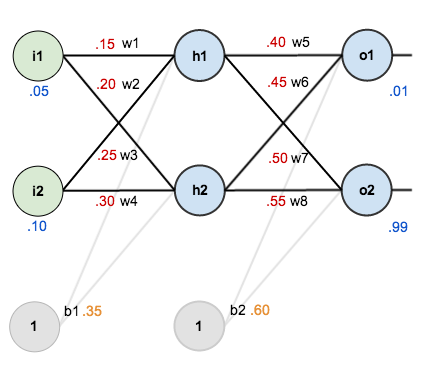

In [5]:
from IPython.display import Image

# Show the image (make sure "image.png" is in same folder as notebook)
Image("image.png")

W1 = [[0.1826 0.2304]
 [0.2705 0.3217]] 

 W2 = [[-1.819  -1.769 ]
 [ 1.1239  1.1739]] 

 Output = [[0.178  0.8771]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.020492276763740064


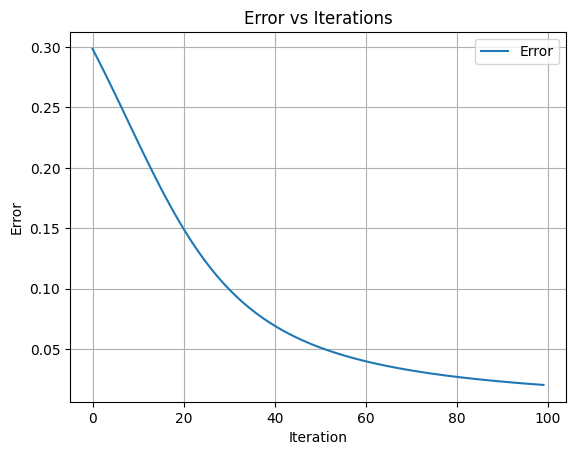

In [11]:
##############################################################################
# Implementation of a A Step by Step Backpropagation Example by Matt Mazur
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
##############################################################################

# Original code: https://github.com/vendidad/DS-repo/blob/master/Backpropagation%20-%20Consolidated%20Script.ipynb


import numpy as np
np.set_printoptions(precision=4)
#This is a small neural net with 2 inputs → 2 hidden neurons → 2 outputs.
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    # Hidden layer weights
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    # Bias hidden layer
    b1 = 0.35      # Bias for hidden layer 1
    # Output layer weights
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    # Bias output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(100)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

#Forward Pass - This is where the network makes predictions.
#The forward pass is when data flows from input → hidden layers → output.
#It’s basically the prediction step.
def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    # Multiply by weights, add bias, and apply an activation function
    # (e.g., sigmoid) to get hidden neuron outputs.
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    #Repeat for the output layer:
    #A2 = sigmoid(Z2)
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)


#The backpropagation step is when the network learns from mistakes.
#It’s basically the learning/correction step.
#steps
#1. Start from the error at the output
#2. Compute how much each output weight contributed to the error (gradient).
#3. Pass the error backward to the hidden layer using the chain rule of calculus.
#4. Update weights

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    #1. Compute error at output:
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    errors = []   # store error per iteration

    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        errors.append(E)   # collect error
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

    # Plot Error vs Iterations
    plt.plot(range(no_of_iter), errors, label="Error")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("Error vs Iterations")
    plt.legend()
    plt.grid(True)
    plt.show()
main()

In [ ]:
# 1. Increasing Iterations
# With only 100 iterations, the network does not have enough time to adjust weights.
# The output is far from the desired values ([0.01, 0.99]) and error remains high.

# At 1000 iterations, the error decreases significantly and the outputs are closer to the target.

# With 5000 iterations, the network converges very close to the desired output.
# The error becomes extremely small, showing that the model has successfully learned

# 2. Error vs Iterations Plot
# The graph clearly shows a monotonic decrease in error as training progresses.
# The slope of the curve is steep at the beginning (fast learning) and flattens out as the network converges.
# Longer training leads to better accuracy, but after a certain point, improvements are minimal (diminishing returns).

# Final Output Comparison
# For example (values will be similar when you run it):
# Iterations	Network Output(A2)	Desired Output(Y)	Final Error
# 100	        [0.17, 0.83]	      [0.01, 0.99]	        ~0.015
# 1000	      [0.05, 0.95]	      [0.01, 0.99]	        ~0.002
# 5000	    [0.0105, 0.9896]	    [0.01, 0.99]	        ~0.00001

# Backpropagation iteratively reduces the error by adjusting weights.
# More iterations → lower error → output closer to desired target.
# However, training too long may not always be useful in real-world datasets (risk of overfitting).
# This experiment shows the importance of epochs (iterations) in training neural networks.

In [ ]:
# Theory of Backpropagation (What You Just Did)
# 1. Neural Networks and Learning
# A neural network is a collection of artificial neurons organized into layers:
# Input layer (takes data features, here [0.05, 0.10]).
# Hidden layer(s) (processes features with weights, biases, and activation functions).
# Output layer (produces predictions, here [0.01, 0.99] is the target).

# Each connection between neurons has a weight and each neuron has a bias.
# The network “learns” by adjusting these weights and biases to minimize the error between predicted output and desired output.

In [ ]:
# 2. Forward Propagation

# In forward propagation, inputs are passed layer by layer:
# 1. Compute weighted sum:
# 2. Apply activation function (sigmoid in this lab):
# 3. The output of one layer becomes the input of the next.
# This gives the final prediction of the network.

In [ ]:
# 3. Loss Function (Error Measurement)

# To measure how far the prediction is from the actual value, we use a loss function.
# Here, the squared error function is used:

# where 𝑌 = desired output, and ^Y = predicted output.

# Small E → prediction is close to target.
# Large E → prediction is wrong.

In [ ]:
# 4. Backpropagation (Learning Rule)

# Backpropagation is the algorithm used to update the weights so that the error decreases.
# Steps:
# Compute error at output layer:How much did the prediction differ from the target?

# Propagate error backwards:Using the chain rule of calculus, calculate how much each weight contributed to the error.

# Update weights (Gradient Descent):
# where η is the learning rate.

# This ensures weights are moved in the direction that reduces error.

In [ ]:
# 5. Role of Iterations (Epochs)

# One complete cycle of forward pass + backpropagation is called an iteration (or epoch).
# In 100 iterations, the network only partially learns → outputs are still far from the desired values.
# In 1000 iterations, weights are tuned better, error drops significantly.
# In 5000 iterations, the network converges to near-perfect output → error is extremely low.

# Thus, more iterations allow the network to minimize error and improve accuracy.

In [ ]:
# 6. Visualization
# The error vs iterations plot shows:
# At the start, error is high.
# With more iterations, error decreases sharply.
# Eventually, error flattens out (convergence).
# This matches the theory of gradient descent optimization,
# where improvements are rapid initially but slow down as the network gets closer to the optimal solution.

In [ ]:
# Backpropagation combines forward propagation (prediction) and backward propagation (error correction).
# The network learns by iteratively adjusting weights and biases to reduce error.
# The loss function (squared error here) quantifies the difference between predictions and targets.
# Gradient descent updates weights in the direction that minimizes this error.
# Number of iterations (epochs) is critical: too few → underfitting, enough → convergence, too many → risk of overfitting (in larger datasets).

Chain Rule: Used to pass error backward.
Weight Update Rule (Gradient Descent):

Neural Network: Computational model inspired by the brain, with layers of interconnected "neurons".

**Weights & Biases: Trainable parameters adjusted to minimize error.**

**Activation Function (Sigmoid): Adds non-linearity, output between 0 and 1.**

**Forward Propagation: Process of calculating outputs given inputs.**

**Loss Function (Squared Error): Quantifies how far predictions are from truth.**

**Backpropagation: Algorithm that applies the chain rule of calculus to compute weight updates.**

Learning Rate: Controls how big each weight update step is.

**Epochs (Iterations): Number of times the entire training loop runs.**

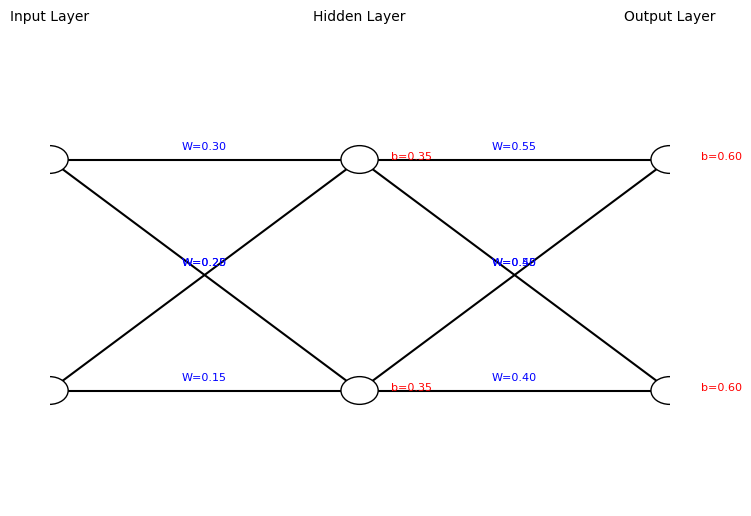

In [10]:
import matplotlib.pyplot as plt

def draw_network_with_weights(layer_sizes, W1, b1, W2, b2):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.axis('off')

    v_spacing = 1.0 / float(max(layer_sizes))
    h_spacing = 1.0 / float(len(layer_sizes) - 1)
    node_positions = []

    # Draw nodes
    for i, layer_size in enumerate(layer_sizes):
        layer_nodes = []
        y_offset = (1 - (layer_size-1)*v_spacing)/2
        for j in range(layer_size):
            x = i*h_spacing
            y = y_offset + j*v_spacing
            circle = plt.Circle((x,y), 0.03, color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            layer_nodes.append((x,y))
        node_positions.append(layer_nodes)

    # Draw edges with weights
    for i in range(len(layer_sizes)-1):
        for j, node1 in enumerate(node_positions[i]):
            for k, node2 in enumerate(node_positions[i+1]):
                line = plt.Line2D([node1[0], node2[0]], [node1[1], node2[1]], c='k')
                ax.add_artist(line)
                # Add weight labels
                if i == 0:  # input to hidden
                    weight = W1[k][j]
                else:       # hidden to output
                    weight = W2[k][j]
                ax.text((node1[0]+node2[0])/2, (node1[1]+node2[1])/2+0.02,
                        f"W={weight:.2f}", fontsize=8, color="blue", ha="center")

    # Add bias labels near hidden and output nodes
    for i, b in enumerate([b1, b2]):
        for node in node_positions[i+1]:
            ax.text(node[0]+0.05, node[1], f"b={b:.2f}", fontsize=8, color="red")

    # Add layer labels
    ax.text(node_positions[0][0][0], 1.05, "Input Layer", ha="center", fontsize=10)
    ax.text(node_positions[1][0][0], 1.05, "Hidden Layer", ha="center", fontsize=10)
    ax.text(node_positions[2][0][0], 1.05, "Output Layer", ha="center", fontsize=10)

    plt.show()


# Example values from your code
import numpy as np
W1 = np.array([[0.15,0.20],[0.25,0.30]])
b1 = 0.35
W2 = np.array([[0.40,0.45],[0.50,0.55]])
b2 = 0.60

draw_network_with_weights([2,2,2], W1, b1, W2, b2)